In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap.csv')
csv2 = pd.read_csv('UniprotHumanProteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot')

print(merged_csv)
# save the merged csv to a file
merged_csv.to_csv('MergedHumanProteome-PickedProteinGroupNoRemap.csv', index=False)

       Unnamed: 0   Q-value Protein Type Protein Uniprot  \
0               0  0.000316           sp          P35527   
1               1  0.000316           sp          P35908   
2               2  0.000316           sp          P67809   
3               3  0.000316           sp          P09972   
4               4  0.000316           sp          P14550   
...           ...       ...          ...             ...   
18758       38859  0.808069           sp          O95561   
18759       38865  0.808211           sp          P35498   
18760       38886  0.808430           sp          Q96T52   
18761       38906  0.808918           sp          Q9NPH3   
18762       38911  0.808952      REV__sp          Q9UKB3   

                                           Protein Label  \
0                                             K1C9_HUMAN   
1                                             K22E_HUMAN   
2                      YBOX1_HUMAN;sp|Q9Y2T7|YBOX2_HUMAN   
3                      ALDOC_HUMAN;sp|P

In [3]:
df = pd.read_csv('MergedHumanProteome-PickedProteinGroupNoRemap.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

print(df_filtered)
df_filtered.to_csv('MergedHumanProteome-PickedProteinGroupNoRemapQ-valuefilter.csv', index=False)

      Unnamed: 0   Q-value Protein Type Protein Uniprot  \
0              0  0.000316           sp          P35527   
1              1  0.000316           sp          P35908   
2              2  0.000316           sp          P67809   
3              3  0.000316           sp          P09972   
4              4  0.000316           sp          P14550   
...          ...       ...          ...             ...   
6229        6216  0.009721      REV__sp          Q9BSH3   
6230        6217  0.009721           sp          O43822   
6231        6218  0.009721           sp          Q03135   
6232        6219  0.009721           sp          Q4ADV7   
6233        6220  0.009880      REV__sp          Q9P2D7   

                                          Protein Label  \
0                                            K1C9_HUMAN   
1                                            K22E_HUMAN   
2                     YBOX1_HUMAN;sp|Q9Y2T7|YBOX2_HUMAN   
3                     ALDOC_HUMAN;sp|P05062|ALDOB_HUMAN

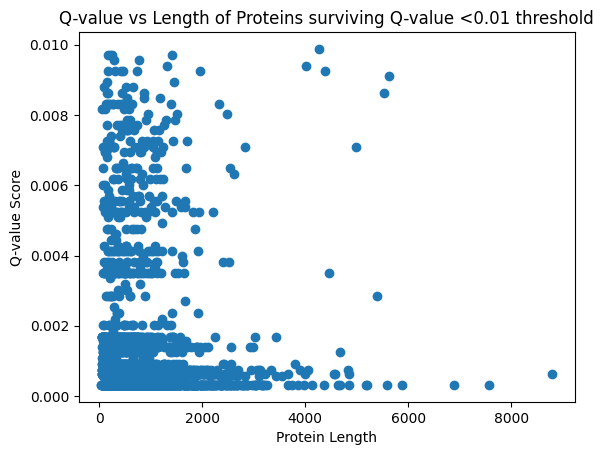

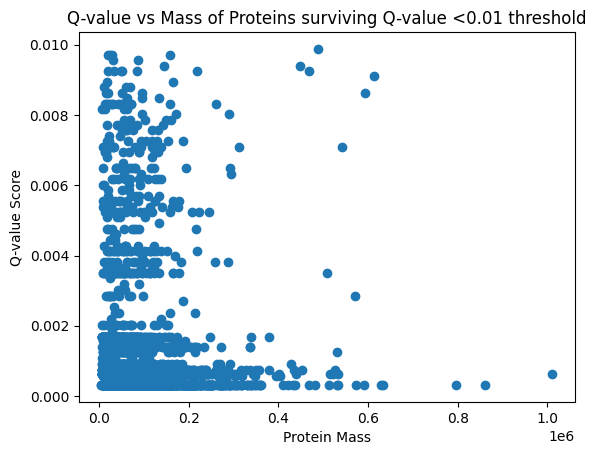

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapQ-valuefilter.csv")

# Create a scatter plot of q-value vs length
plt.scatter(data["Length"], data["Q-value"])
plt.title('Q-value vs Length of Proteins surviving Q-value <0.01 threshold')
plt.xlabel("Protein Length")
plt.ylabel("Q-value Score")
plt.show()

# Create a scatter plot of q-value vs mass
plt.scatter(data["Mass"], data["Q-value"])
plt.title('Q-value vs Mass of Proteins surviving Q-value <0.01 threshold')
plt.xlabel("Protein Mass")
plt.ylabel("Q-value Score")
plt.show()

# Evaluation of Relationship between Protein Properties and Q-value

Intercept: 0.0007356679865079301
Slope: 1.422141354200204e-09


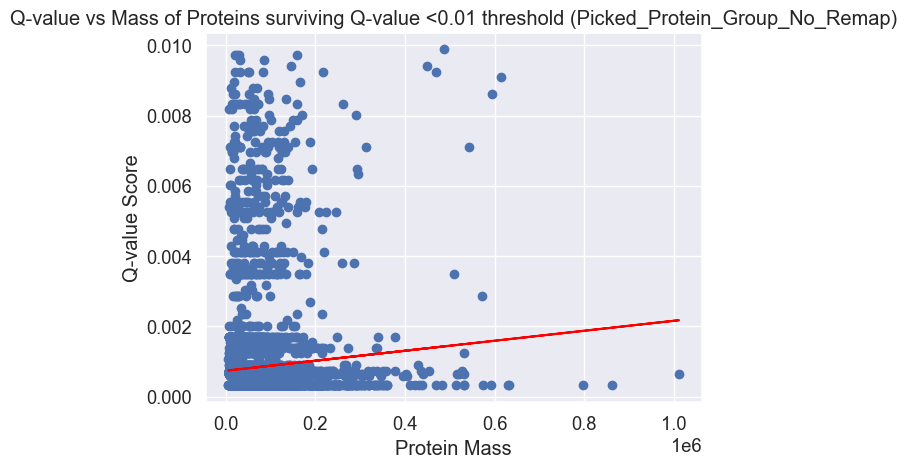

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapQ-valuefilter.csv")

# Extract mass and q-value columns
Mass = data["Mass"]
Q_value = data["Q-value"]

# Convert mass and q-value data to numpy arrays and reshape them
Mass = np.array(Mass).reshape((-1, 1))
Q_value = np.array(Q_value)

# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(Mass, Q_value)

# Print the intercept and slope of the linear regression line
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Plot the data and the linear regression line
plt.scatter(Mass, Q_value)
plt.plot(Mass, model.predict(Mass), color='red')
plt.title('Q-value vs Mass of Proteins surviving Q-value <0.01 threshold (Picked_Protein_Group_No_Remap)')
plt.xlabel("Protein Mass")
plt.ylabel("Q-value Score")
plt.show()

Intercept: 0.000732842905879416
Slope: 1.6349604679833552e-07


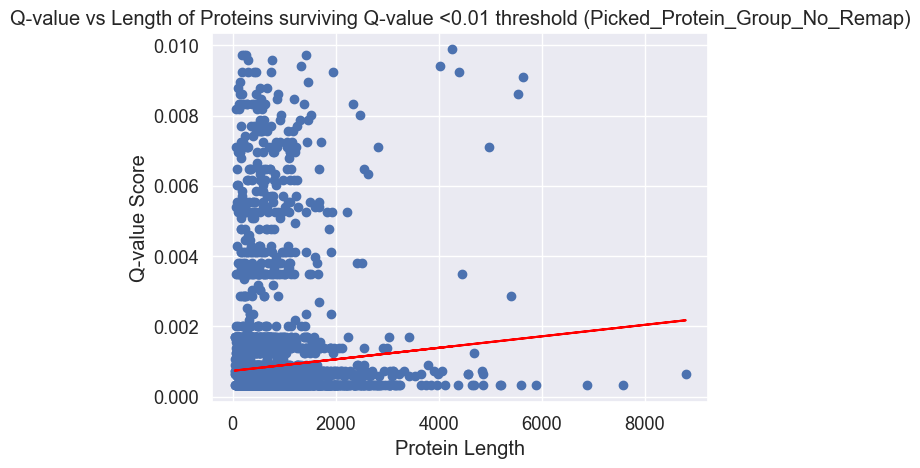

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapQ-valuefilter.csv")

# Extract mass and q-value columns
Length = data["Length"]
Q_value = data["Q-value"]

# Convert mass and q-value data to numpy arrays and reshape them
Length = np.array(Length).reshape((-1, 1))
Q_value = np.array(Q_value)

# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(Length, Q_value)

# Print the intercept and slope of the linear regression line
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Plot the data and the linear regression line
plt.scatter(Length, Q_value)
plt.plot(Length, model.predict(Length), color='red')
plt.title('Q-value vs Length of Proteins surviving Q-value <0.01 threshold (Picked_Protein_Group_No_Remap)')
plt.xlabel("Protein Length")
plt.ylabel("Q-value Score")
plt.show()

In [8]:
import pandas as pd
import numpy as np

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapQ-valuefilter.csv")

# Extract protein mass, protein length, and q-value columns
mass = data["Mass"]
length = data["Length"]
q_value = data["Q-value"]

# Calculate the covariance matrix
cov_matrix = np.cov([mass, length, q_value])

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[4.30850396e+09 3.85731133e+07 6.12730165e+00]
 [3.85731133e+07 3.45820578e+05 5.65402974e-02]
 [6.12730165e+00 5.65402974e-02 1.73973850e-06]]


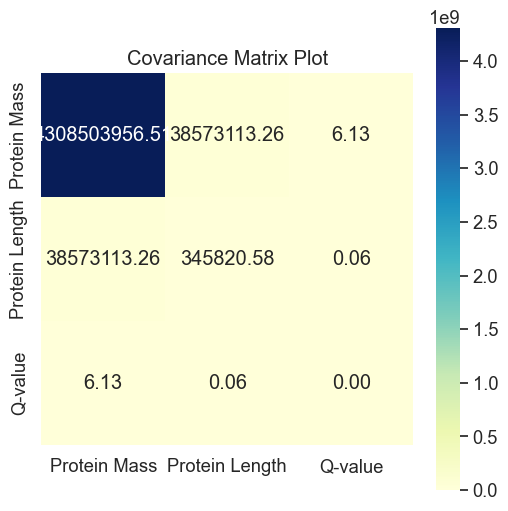

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapQ-valuefilter.csv")

# Extract protein mass, protein length, and q-value columns
mass = data["Mass"]
length = data["Length"]
q_value = data["Q-value"]

# Calculate the covariance matrix
cov_matrix = np.cov([mass, length, q_value])

# Create a heatmap plot of the covariance matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 6))
sns.heatmap(cov_matrix, annot=True, cmap="YlGnBu", fmt=".2f", square=True,
            xticklabels=["Protein Mass", "Protein Length", "Q-value"],
            yticklabels=["Protein Mass", "Protein Length", "Q-value"])
plt.title("Covariance Matrix Plot")
plt.show()

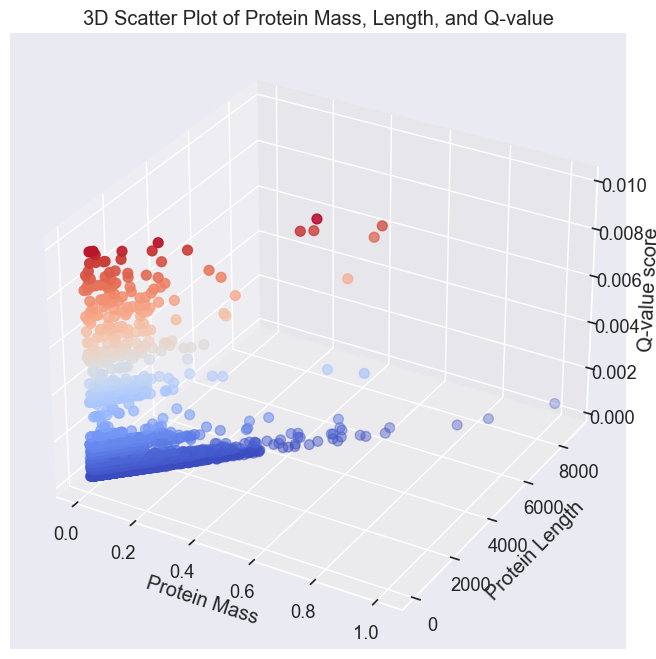

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapQ-valuefilter.csv")

# Extract protein mass, protein length, and q-value columns
mass = data["Mass"]
length = data["Length"]
q_value = data["Q-value"]

# Create a 3D scatter plot of the three variables
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mass, length, q_value, c=q_value, cmap="coolwarm", s=50)
ax.set_xlabel("Protein Mass")
ax.set_ylabel("Protein Length")
ax.set_zlabel("Q-value score")
plt.title("3D Scatter Plot of Protein Mass, Length, and Q-value")
plt.show() 

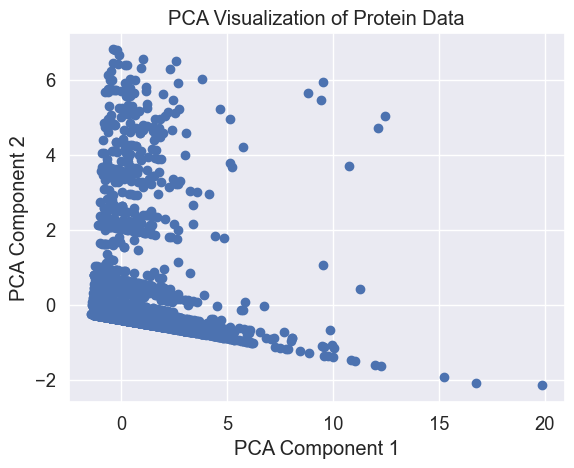

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv("MergedHumanProteome-PickedProteinGroupNoRemapQ-valuefilter.csv")

# Extract the relevant columns
X = data[['Mass', 'Length', 'Q-value']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Protein Data')
plt.show()